# Fully Connected Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Iris dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Music data. You will be performing a genre classification of tracks into 16 different classes

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the cells in Genre Classification part. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [1]:
import numpy as np
from blg561.layer import layer
from blg561.checks import *
from blg561.utils import load_mnist_data
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

### To auto-reload your modules from the *.py files, re run the following cell

In [2]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [3]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])


relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


### Backward pass : 
Go under blg561e/layer.py and find Affine class. Implement the backward pass for Affine layer.

In [4]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  7.882509889959262e-10
dw error:  1.3592685518020832e-10
db error:  1.8477112902497496e-10


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [5]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [6]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)

# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  3.2756263483625388e-12


### d. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the end of the network, we utilize softmax function to turn the likelihood of each class into class probablities. Then, we pick the class label by selecting the class with the highest probability.
For a 2-class (binary) problem, this reduces to using binary cross entropy loss.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [7]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = layer.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302478992941867
dx error:  8.880897580472736e-09


### e. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivate. Do not forget to use your activation in training part with the Iris data to show that it works and makes sense. You can also plot your activation for litte extra credits.

In [8]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  4.5549818399597506e-10


### Swish Activation Function: https://arxiv.org/pdf/1710.05941.pdf

$$ Swish(x,\beta)= \frac{x}{1+e^{-x\beta}} $$
$$ \frac{Swish(x,\beta)}{dx}= \frac{1}{1+e^{-x\beta}}+\frac{\beta x e^{-x\beta}}{\left(e^{-x\beta}+1\right)^2} $$

I implemented $\beta$ value as $\textbf{1}$

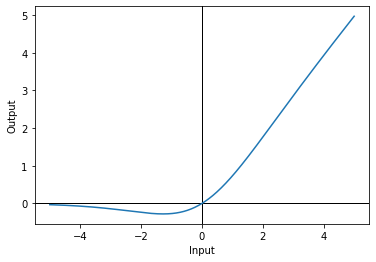

In [9]:
dummy = np.linspace(-5,5,1000)
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(y=0, c="black", linewidth=1)
plt.axvline(x=0, c="black", linewidth=1)
plt.plot(dummy, act.forward(dummy))
plt.show()

import warnings
warnings.filterwarnings("ignore") ## to clear following deprecated warnings


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization**

In [10]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSDGOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]



In [11]:
student_out = []
for i in range(2):
    #print("W",toyModel[i].W)
    #print("b",toyModel[i].b)
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    #print(student_out[i])
    #print(expected[i])
    relError = rel_error(student_out[i], expected[i])
    print(relError)
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

5.987167840823031e-08
Testing Weights of 0th layer
8.229930003822076e-09
Testing biases of 1th layer
1.564632398288269e-08
Testing Weights of 0th layer
2.264798756399586e-07
Testing biases of 1th layer


In [12]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]
    
    


In [13]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
    
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known IRIS dataset.

In [14]:
from sklearn import preprocessing
from sklearn.datasets import load_iris  # Load dataset
data = load_iris()
X, y = data.data, data.target
model = layer.Model() # Create a model instance
 
# Iris dataset has 4 features, so the input size of first layer is 4. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
layers = [layer.AffineLayer(4,64), layer.YourActivation(), layer.AffineLayer(64,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(150)
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0
n_epochs = 1200
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-1, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
 
    model.backward(y_train)
    optimizer.optimize()
    
    if epoch % test_every == 0:
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        test_losses.append(loss)
        test_accs.append([test_acc for i in range(test_every)])
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 1.5048760683600093, Accuracy: 0.4166666666666667
Epoch: 0, Test Loss: 0.9821657477045797, Test Accuracy: 0.4
Epoch: 50, Loss: 0.16978851209145826, Accuracy: 0.9666666666666667
Epoch: 100, Loss: 0.09325401861481045, Accuracy: 0.9666666666666667
Epoch: 150, Loss: 0.06886571173770346, Accuracy: 0.975
Epoch: 200, Loss: 0.056620823211832115, Accuracy: 0.9833333333333333
Epoch: 200, Test Loss: 0.14910631533686597, Test Accuracy: 0.9333333333333333
Epoch: 250, Loss: 0.049257424611554426, Accuracy: 0.9833333333333333
Epoch: 300, Loss: 0.044320411453430957, Accuracy: 0.9833333333333333
Epoch: 350, Loss: 0.04075502697657094, Accuracy: 0.9833333333333333
Epoch: 400, Loss: 0.038040052802348234, Accuracy: 0.9833333333333333
Epoch: 400, Test Loss: 0.1480557495043589, Test Accuracy: 0.9333333333333333
Epoch: 450, Loss: 0.03588899532092667, Accuracy: 0.9833333333333333
Epoch: 500, Loss: 0.03413121384515708, Accuracy: 0.9833333333333333
Epoch: 550, Loss: 0.032658654641613716, Accuracy: 

### Plot the training and test loss curves for diagnostics below:

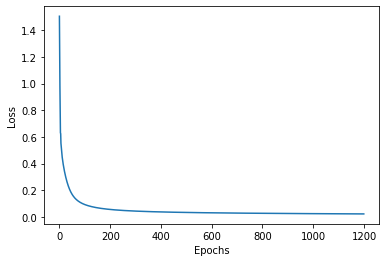

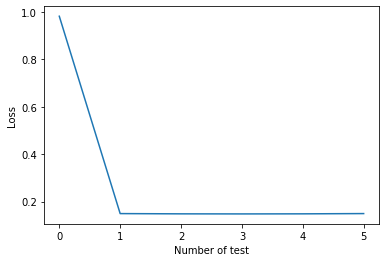

In [15]:
ep_counter = np.arange(n_epochs)
plt.plot(ep_counter, train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_ite = np.arange(len(test_losses))
plt.plot(test_ite, test_losses)
plt.xlabel('Number of test')
plt.ylabel('Loss')
plt.show()


### Music Genre Classification

Now, in this part, you will work with music data (https://github.com/mdeff/fma) for genre classification. Tracks are from 16 genre classes which are: ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']. Below, preprocessing codes are already implemented. You have to download data from https://drive.google.com/open?id=1pxbCfRj8x7cekSH--652qy-Wz8QFcvek and place them properly. You will need to use batch-wise optimizer since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [16]:
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [17]:
features = pd.read_csv('features_medium.csv', index_col=0, header=[0, 1, 2])
tracks = pd.read_csv('tracks_medium.csv', index_col=0, header=[0, 1])

In [18]:
ipd.display(tracks['track'].loc[[10,213,397]])
ipd.display(tracks['artist'].loc[[10,213,397]])

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
213,256000,0,Luke Wyland,2008-11-26 01:48:12,2007-01-01 00:00:00,247,10,Pop,[10],[10],NaN,2828,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1148,NaN,1,NaN,[],Boute
397,256000,0,Borful Tang,2008-11-26 01:57:15,2006-08-30 00:00:00,240,1,Electronic,[15],[15],NaN,3102,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,427,NaN,4,NaN,[],The Tides Of Land


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
10,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN
213,2005-01-01 00:00:00,NaN,"Aagoo, Oedipus, Popfrenzy, Inpartmaint","<p><span style=""font-family:Verdana, Geneva, A...",1,2008-11-26 01:51:30,11,66,45.523452,"Portland, OR",-122.676207,Luke Wyland and Dana Valatka,Au,NaN,['au'],http://au-au-au.com/ http://myspace.com/peaof...,NaN
397,NaN,NaN,Snurp,<p><em>The Story of Borful Tang</em> is a long...,0,2008-11-26 01:59:22,8,90,37.774929,"San Francisco, CA",-122.419415,Dominic Cramp,Borful Tang,"Qulfus, Carla Bozulich's Evangelista",['borful tang'],http://www.gigantesound.com/artist_borful.html,NaN


In [19]:
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
print('Top genres ({}): {}'.format(len(genres), genres))

19922 training examples, 2505 validation examples, 2573 testing examples
Top genres (16): ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']


In [20]:
# Assign an integer value to each genre.
columns = ['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc',
           'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff',
           'tonnetz', 'zcr']
enc = LabelEncoder()
labels = tracks['track', 'genre_top']

# Split in training, validation and testing sets.
y_train = enc.fit_transform(labels[train])
y_val = enc.transform(labels[val])
y_test = enc.transform(labels[test])
x_train = features.loc[train, columns].as_matrix()
x_val = features.loc[val, columns].as_matrix()
x_test = features.loc[test, columns].as_matrix()

x_train, y_train = shuffle(x_train, y_train, random_state=42)



In [21]:
num_features = x_train.shape[1]
num_train_samples = y_train.size
num_val_samples = y_val.size
num_test_samples = y_test.size
num_labels = np.unique(y_train).size

print('{} training examples, {} validation examples, {} testing examples'.format(num_train_samples, num_val_samples, num_test_samples))
print('{} features, {} classes'.format(num_features, num_labels))

19922 training examples, 2505 validation examples, 2573 testing examples
511 features, 16 classes


**Standardize features by removing the mean and scaling to unit variance. Extract mean and standard deviation only from training set. Keep mean and std as variables, you can use it for the demo part.**

In [22]:
mean = np.mean(x_train, axis=0) # 
x_train -= mean # 

std = np.std(x_train, axis=0) # 
x_train /= std # 

def standardize(mean, std, x):
    x -= mean
    x /= std
    return x


x_test = standardize(mean, std, x_test)
x_val = standardize(mean, std, x_val)

print("Train Set Mean and StDev: " + str(np.mean(x_train)) + ", " + str(np.std(x_train)))
print("Test Set Mean and StDev: " + str(np.mean(x_test)) + ", " + str(np.std(x_test)))
print("Validation Set Mean and StDev: " + str(np.mean(x_val)) + ", " + str(np.std(x_val)))

Train Set Mean and StDev: 4.997851593793429e-16, 0.999999999999999
Test Set Mean and StDev: -0.007902881499525649, 1.011598269307237
Validation Set Mean and StDev: 0.005737224748093465, 1.0902067144975154


**You will use your implementations (layers.py) below to carry out the classification of each track vector into 16 classes. Construct your model with all its layers below.**

### Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such. Also, try using an L1 regularizer or other regularizer you may come up with. 
### Compare the outcomes. Avoid overfitting and underfitting as much as possible.  
### We expect you to get at least 60% Test Accuracy**

In [23]:
def xavier_init(model): ## execute xavier init on the model and return it
    
    for i in range(len(model.layers)): ## iterate over layers
        
        if i % 2 == 0: ## every affine layer
            
            input_shape = model.layers[i].W.shape[0]
            
            output_shape = model.layers[i].W.shape[1]
            
            model.layers[i].W = np.random.randn(input_shape,output_shape ) * np.sqrt(2.0 / output_shape) ## xavier init
            
    return model

def whole_train(x_train, y_train, x_val, y_val, lr=1e-1, reg=1e-2, epochs=200, verbose=False):
    
    
    model = layer.Model()

    layers = [layer.AffineLayer(511,64), layer.YourActivation(),\
              layer.AffineLayer(64,32), layer.YourActivation(),\
              layer.AffineLayer(32,16),layer.Softmax()]

    model(layers)

    predictions  = np.ones(150)
    train_accs = []
    test_accs = []
    train_losses = []
    test_losses = []
    W_affine_layers = []
    
    regularization_strength = reg
    n_epochs = epochs
    print_every = 50
    test_every = 1
    
    model = xavier_init(model)
    
    optimizer = layer.SGDWithMomentum(model,lr=lr, regularization_str=regularization_strength)

    for epoch in range(n_epochs):

        softmax_out = model.forward(x_train)

        predictions = np.argmax(softmax_out, axis=1)
        train_acc = np.mean(predictions == y_train)
        loss = layer.loss(softmax_out, y_train)

        train_accs.append(train_acc)
        train_losses.append(loss)

        if (epoch % print_every == 0) and verbose:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))

        model.backward(y_train)
        optimizer.optimize()

        if epoch % test_every == 0:
            softmax_out = model.forward(x_val)
            predictions = np.argmax(softmax_out, axis=1)
            loss = layer.loss(softmax_out, y_val)
            test_acc = np.mean(predictions == y_val)
            test_losses.append(loss)
            test_accs.append([test_acc for i in range(test_every)])
            if (epoch % print_every == 0)and verbose:
                print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))
            
    return train_losses, test_losses, model

train_losses, val_losses, model = whole_train(x_train, y_train, x_val, y_val, epochs=800, verbose=True)


Epoch: 0, Loss: 14.66204500856628, Accuracy: 0.028862563999598433
Epoch: 0, Test Loss: 6.770888868002919, Test Accuracy: 0.21037924151696608
Epoch: 50, Loss: 1.5180360437797924, Accuracy: 0.5314727437004317
Epoch: 50, Test Loss: 1.5493679299778294, Test Accuracy: 0.5349301397205589
Epoch: 100, Loss: 1.338267950497664, Accuracy: 0.58237124786668
Epoch: 100, Test Loss: 1.3883030152673608, Test Accuracy: 0.5840319361277445
Epoch: 150, Loss: 1.240820268797082, Accuracy: 0.6125890974801727
Epoch: 150, Test Loss: 1.2998024380460131, Test Accuracy: 0.6023952095808384
Epoch: 200, Loss: 1.177503205703911, Accuracy: 0.6322156409998996
Epoch: 200, Test Loss: 1.2436327190034269, Test Accuracy: 0.6183632734530938
Epoch: 250, Loss: 1.132101767791352, Accuracy: 0.6461198674831844
Epoch: 250, Test Loss: 1.207748492355559, Test Accuracy: 0.6235528942115769
Epoch: 300, Loss: 1.09659522040706, Accuracy: 0.6564099989960848
Epoch: 300, Test Loss: 1.1835306701714319, Test Accuracy: 0.6283433133732534
Epoch:

### Plot histogram of the weights of affine layers to see whether the weights vanish or not and comment.

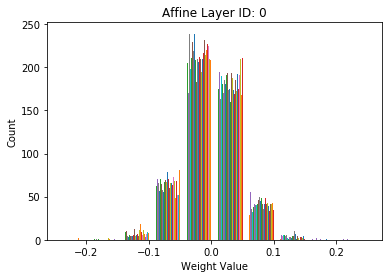

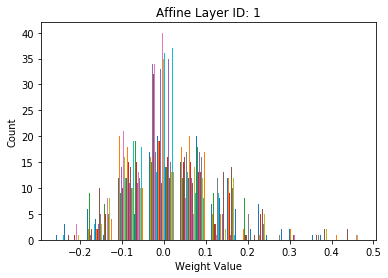

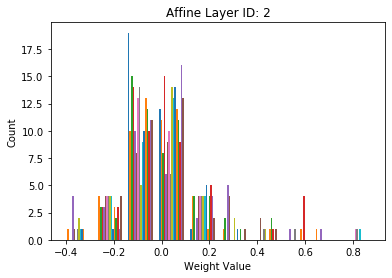

In [24]:
import matplotlib

for i in range(len(model.layers)):
    
    if i % 2 == 0: # every second layer is an affine layer
        
        matplotlib.pyplot.hist(model.layers[i].W)
        plt.xlabel('Weight Value')
        plt.ylabel('Count')
        plt.title("Affine Layer ID: " + str(i//2))
        plt.show()
        
## There is not that much vanishing since most of the weights are not cumulated on the vanishing point (0)


### Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors

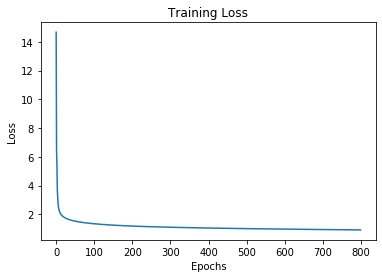

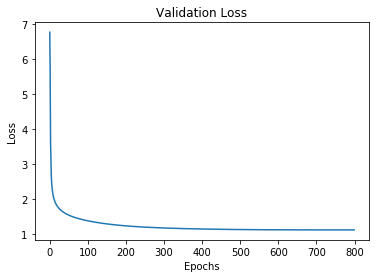

In [25]:
set_size = np.arange(len(train_losses))

plt.plot(set_size, train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training Loss")

plt.show()

set_size = np.arange(len(val_losses))

plt.plot(set_size, val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Validation Loss")

plt.show()

### Plot the training and validation losses as you vary the Learning Parameter alpha

In [26]:
train_losses1, val_losses1, model = whole_train(x_train, y_train, x_val, y_val, epochs=675, lr=1)
print("Training with LR 1 completed!")

train_losses2, val_losses2, model = whole_train(x_train, y_train, x_val, y_val, epochs=675, lr=0.1)
print("Training with LR 0.1 completed!")

train_losses3, val_losses3, model = whole_train(x_train, y_train, x_val, y_val, epochs=675, lr=0.01)
print("Training with LR 0.01 completed!")

Training with LR 1 completed!
Training with LR 0.1 completed!
Training with LR 0.01 completed!


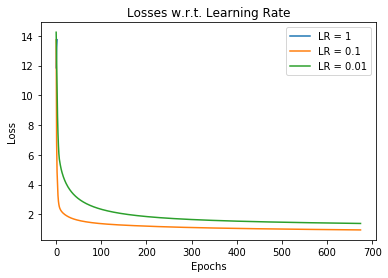

In [27]:
set_size = np.arange(len(train_losses1))

plt.plot(set_size, train_losses1, label='LR = 1')
plt.plot(set_size, train_losses2, label='LR = 0.1')
plt.plot(set_size, train_losses3, label='LR = 0.01')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Losses w.r.t. Learning Rate")
plt.legend(loc='upper right')

plt.show()

### Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers

In [28]:
from numpy import random


def xavier_init(model): ## execute xavier init on the model and return it
    
    for i in range(len(model.layers)): ## iterate over layers
        
        if i % 2 == 0: ## every affine layer
            
            input_shape = model.layers[i].W.shape[0]
            
            output_shape = model.layers[i].W.shape[1]
            
            model.layers[i].W = np.random.randn(input_shape,output_shape) * np.sqrt(2.0 / output_shape) ## xavier init
            
    return model


def get_mini_batches(X, y, batch_size):

    
    random_idxs = random.choice(X.shape[0], X.shape[0], replace=False)
    
    X_shuffled = X[random_idxs]
    y_shuffled = y[random_idxs]
    
    mini_batches = [(X_shuffled[i*batch_size:(i+1)*batch_size], y_shuffled[i*batch_size:(i+1)*batch_size]) for
                   i in range(X.shape[0] // batch_size)]
    
    return mini_batches

def get_mb_len(X, y, batch_size):

    
    random_idxs = random.choice(X.shape[0], X.shape[0], replace=False)
    
    X_shuffled = X[random_idxs]
    y_shuffled = y[random_idxs]
    
    mini_batches = [(X_shuffled[i*batch_size:(i+1)*batch_size], y_shuffled[i*batch_size:(i+1)*batch_size]) for
                   i in range(X.shape[0] // batch_size)]
    
    return len(mini_batches)

def whole_train_w_batch(x_train, y_train, x_val, y_val, x_test, y_test, lr=1e-1, reg=1e-2, epochs=200, verbose=False, optim="sgd", batch=500):
    
    
    model = layer.Model()

    layers = [layer.AffineLayer(511,64), layer.YourActivation(),\
              layer.AffineLayer(64,32), layer.YourActivation(),\
              layer.AffineLayer(32,16),layer.Softmax()]

    model(layers)
    
    model = xavier_init(model)
    
    predictions  = np.ones(150)
    
    train_accs = []
    test_accs = []
    val_accs = []
    train_losses = []
    test_losses = []
    val_losses = []
    W_affine_layers = []
    
    regularization_strength = reg
    n_epochs = epochs

    print_every = 100
    test_every = 1

    mb_len = get_mb_len(x_train, y_train, batch)
    
    if (optim=="sgd"):
        optimizer = layer.VanillaSDGOptimizer(model,lr=lr, regularization_str=regularization_strength)
        
    elif (optim=="sgdm"):
        optimizer = layer.SGDWithMomentum(model,lr=lr, regularization_str=regularization_strength)
        
    for epoch in range(n_epochs):
        
        i = 0
        
        val_acc_per_epoch = 0
        tra_acc_per_epoch = 0
        tes_acc_per_epoch = 0
        
        for xybatch in get_mini_batches(x_train, y_train, batch):

            xbatch = xybatch[0]
            ybatch = xybatch[1]

            softmax_out = model.forward(xbatch)

            predictions = np.argmax(softmax_out, axis=1)
            tra_acc_per_epoch += np.mean(predictions == ybatch)
            tra_loss = layer.loss(softmax_out, ybatch)
            train_losses.append(tra_loss)
            model.backward(ybatch)
            optimizer.optimize() 

            if epoch % test_every == 0:
                softmax_out = model.forward(x_val)
                predictions = np.argmax(softmax_out, axis=1)
                val_loss = layer.loss(softmax_out, y_val)
                val_acc_per_epoch += np.mean(predictions == y_val)
                val_losses.append(val_loss)
                
                softmax_out = model.forward(x_test)
                predictions = np.argmax(softmax_out, axis=1)
                tes_loss = layer.loss(softmax_out, y_test)
                tes_acc_per_epoch += np.mean(predictions == y_test) 
                test_losses.append(tes_loss)
                
        tra_acc_per_epoch /= mb_len
        tes_acc_per_epoch /= mb_len 
        val_acc_per_epoch /= mb_len
        
        train_accs.append(tra_acc_per_epoch)
        test_accs.append(tes_acc_per_epoch)
        val_accs.append(val_acc_per_epoch)
        
        if (epoch % print_every == 0) and verbose:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, tra_loss, tra_acc_per_epoch))
            print("Epoch: {}, Val Loss: {}, Val Accuracy: {}".format(epoch, val_loss, val_acc_per_epoch))
            print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, tes_loss, tes_acc_per_epoch))                
            
            
    return train_losses, test_losses, val_losses, train_accs, test_accs, val_accs, model

In [29]:
train_losses1, a, val_losses1, b, c, d, model = whole_train_w_batch(x_train, y_train, x_val, y_val, x_test, y_test, batch=5000, epochs=15, optim="sgd")
print("Training with SGD completed!")

train_losses2, a, val_losses2, b, c, d, model = whole_train_w_batch(x_train, y_train, x_val, y_val, x_test, y_test, batch=5000, epochs=15, optim="sgdm")
print("Training with SGD + Momentum completed!")

Training with SGD completed!
Training with SGD + Momentum completed!


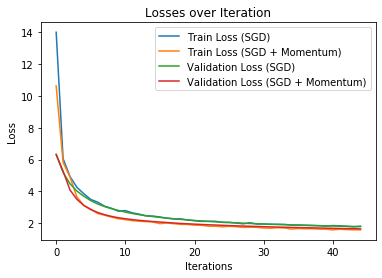

In [30]:
set_size = np.arange(len(train_losses1))

plt.plot(set_size, train_losses1, label='Train Loss (SGD)')
plt.plot(set_size, train_losses2, label='Train Loss (SGD + Momentum)')
plt.plot(set_size, val_losses1, label='Validation Loss (SGD)')
plt.plot(set_size, val_losses2, label='Validation Loss (SGD + Momentum)')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Losses over Iteration")
plt.legend(loc='upper right')

plt.show()

### Finally, fix your model and hyperparameters. Plot accuracy of your classification for training, validation set and Test set. 

In [31]:
train_losses, test_losses, val_losses, train_accs, test_accs, val_accs, model = whole_train_w_batch(x_train, y_train, x_val, y_val, x_test, y_test, epochs=501, optim="sgdm", batch=5000, verbose=True)

Epoch: 0, Loss: 3.9130090271027687, Accuracy: 0.17479999999999998
Epoch: 0, Val Loss: 3.2579353543338647, Val Accuracy: 0.2364604125083167
Epoch: 0, Test Loss: 3.2728145116974985, Test Accuracy: 0.24614587381785205
Epoch: 100, Loss: 1.0884616688813948, Accuracy: 0.6532
Epoch: 100, Val Loss: 1.2238713149849034, Val Accuracy: 0.6263473053892216
Epoch: 100, Test Loss: 1.3226075733393508, Test Accuracy: 0.6038346936131623
Epoch: 200, Loss: 0.9452547630270921, Accuracy: 0.6994666666666668
Epoch: 200, Val Loss: 1.1469805156528645, Val Accuracy: 0.6508316699933466
Epoch: 200, Test Loss: 1.2383265025648338, Test Accuracy: 0.6305220883534137
Epoch: 300, Loss: 0.8689673308857607, Accuracy: 0.7272
Epoch: 300, Val Loss: 1.137343301224738, Val Accuracy: 0.6568196939454424
Epoch: 300, Test Loss: 1.218042258944134, Test Accuracy: 0.6319471434123591
Epoch: 400, Loss: 0.8381455813299737, Accuracy: 0.7458
Epoch: 400, Val Loss: 1.1484731131335495, Val Accuracy: 0.658150365934797
Epoch: 400, Test Loss: 1.

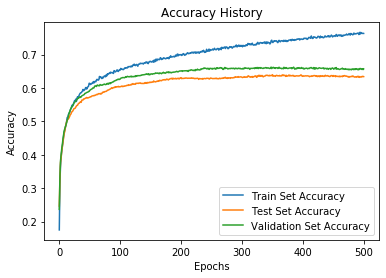

In [32]:
set_size = np.arange(len(train_accs))

plt.plot(set_size, train_accs, label='Train Set Accuracy')
plt.plot(set_size, test_accs, label='Test Set Accuracy')
plt.plot(set_size, val_accs, label='Validation Set Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy History")
plt.legend()

plt.show()

### Plot a Confusion Matrix for test set 

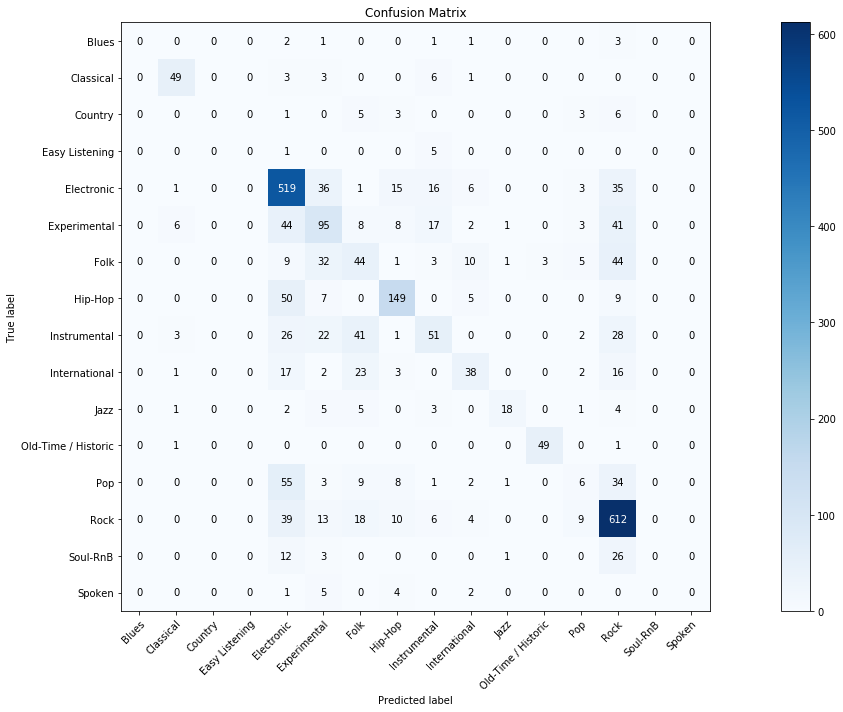

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

softmax_out = model.forward(x_test)
predictions = np.argmax(softmax_out, axis=1)

np.set_printoptions(precision=2)

plot_confusion_matrix(y_test, predictions, classes=genres, title='Confusion Matrix')


plt.show()



### Do model of your demo with popular songs

In [34]:
# Demo is not necessary but it is FUN!
# You have to install librosa library by using "pip install librosa"
# If you are getting NoBackEndError while loading track try "sudo apt-get install libav-tools"
# Give filepath to mp3 of your favorite songs and see how good is your model at classifying them.

import librosa
#filepath = 'music/BohemianRhapsody(Cover).mp3'
filepath = 'music/Chopin.mp3'

x, sr = librosa.load(filepath, sr=None, mono=True) #librosa.load(librosa.util.example_audio_file(), duration=5.0)#
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 10,40
ipd.Audio(data=x[start*sr:end*sr], rate=sr)



Duration: 242.73s, 10704384 samples


In [35]:
from blg561.extract_features import extract_features

x_feat = extract_features(x,sr)

# You have to transform features to standard scale using mean and std calculated before. 

x_feat = [x_feat.values] # 1D to 2D transformation

x_feat = standardize(mean, std, x_feat) # Standardization

In [36]:
softmax_out = model.forward(x_feat)
prediction = np.argmax(softmax_out)
print(enc.inverse_transform([prediction]))

['Classical']
